## Homework for the teacher
Solve

$$ \int \sqrt{\tan(x)} dx $$

`Sympy` simply cannot do it

[check sympy issue #3952](https://code.google.com/archive/p/sympy/issues/3952)

[WolframAlpha can do it](https://www.wolframalpha.com/input?i=int%28+sqrt%28tan%28x%29%29%2Cx%29)

Maxima can do it: Here is the maxima code:

```
integrate(sqrt(tan(x)),x);
diff(%,x);
ratsimp(%);
trigsimp(%);
```


Even symbolab can do it and show all the steps:
[check this symbolab link](https://www.symbolab.com/solver/integral-calculator/integral%20%5Cint%20sqrt(tan(x))?or=gms)





[Here is my post in StackOverflow](https://stackoverflow.com/questions/78212949/sympy-cannot-integrate-sqrttanx).


`SymPy` no es a prueba de fuego y tiene sus **debilidades**.
En ese caso se acude a otros recursos:

* symbolab
* WolframAlpha
* Maxima
* Matlab ?
* etc

### Actividad 1
Resuelva usano `SymPy` (ver clase anterior) el problema de valor inicial

$$y' = \cot t \csc t  \quad , \quad y(\pi/2) = -1. $$

## Integrales definidas que producen escalares.
Este tipo de integrales son de la forma

$$\int_a^b f(x) dx .$$
Por ejemplo

$$\int_0^1 \frac{\mathrm{e}^x}{\sqrt{ \mathrm{e}^{2x}+9}} .$$
Veamos

In [1]:
from sympy import integrate, symbols
import sympy as sp
x = symbols('x')
f = integrate( sp.exp(x)/ sp.sqrt( sp.exp(2*x) + 9), (x, 0, 1))
f


-asinh(1/3) + asinh(E/3)

In [2]:
# a veces quiere uno valores numericos
from sympy import N
N(f)

0.485939520130385

## Integrales definidas que son funciones de el valor del integrando.

Ejemplo: Funcion Euler-Gamma


$$\Gamma(z) = \int_0^{\infty} t^{z-1} \mathrm{e}^{-t} dt .$$



In [5]:
from sympy import oo  # oo es infinito en SymPy
t = symbols('t')
z= symbols('z')
gamma = integrate( t**(z-1)*sp.exp(-t), (t, 0, oo))
gamma

Piecewise((gamma(z), re(z) > 0), (Integral(t**(z - 1)*exp(-t), (t, 0, oo)), True))

In [6]:
# si queremos suprimir la segunda rama,
z = symbols('z', positive=True)
gamma = integrate( t**(z-1)*sp.exp(-t), (t, 0, oo))
gamma

gamma(z)

In [7]:
# la podemos "lambdify" , volver funcion corriente.
# lambdify nos arra el problema de definir
# def  gammax(z):
#    return gamma(z) # si esto no trabaja entonces usar "eval", "subs", "substitute" ?
from sympy import lambdify
gammax = lambdify(z, gamma, "numpy")
gammax

<function _lambdifygenerated(z)>

In [8]:
# recuerde que Gamma(n)=(n-1)! para n entero
gammax(3)

2.0

In [9]:
gammax(6) # 5 x 4 x 3 x 2 x 1

120.0

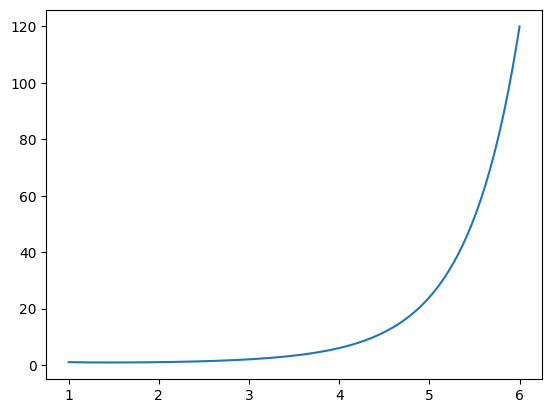

In [12]:
# graficamos la funcion Gamma en un intervalo positivo
import matplotlib.pyplot as plt
import numpy as np

# dominio
domain = np.linspace(1,6, 200) # entre 1 y 6 y 200 muestras
f2 = np.vectorize(gammax)

plt.plot(domain, f2(domain))




## Integrales definidas con la variable en uno de los limites.
Por ejemplo:

* Logaritmo
$$\log t = \int_{1}^t \frac{dx}{x} .$$

* Otro ejemplo
$$\int_1^t x^{10} \mathrm{e}^x dx. $$

In [13]:
from sympy import log
myLog = integrate( 1/x, (x, 1, t))
log == myLog



False

In [15]:
a=100
myLog = integrate(1/x, (x, 1, a))
print(myLog)
print(log(a))
print(myLog - log(a))

log(100)
log(100)
0


In [18]:
print(type(myLog))
print(type(log))

log
<class 'sympy.core.function.FunctionClass'>


In [19]:
myLog == log(a)

True

In [21]:
# segundo ejemplo
f = integrate( x**10*sp.exp(x), (x, 1, t))
f

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

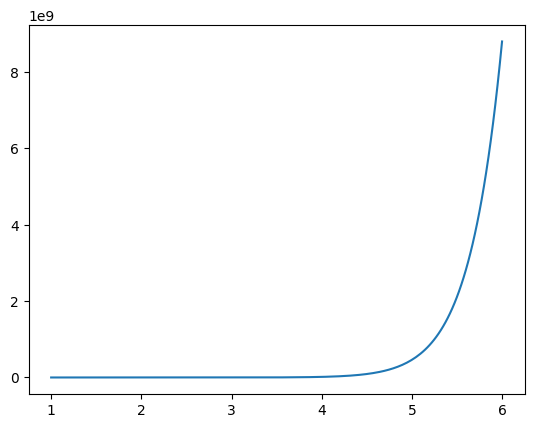

In [24]:
# grafiquemos
ft = lambdify(t, f, "numpy")
plt.plot(domain, ft(domain))

## Integrales que no tienen solucion analitica.
Analizamos tres familia. Gaussianas, Fresnel, Elipticas.

1. **Gaussiana**
$$\int_a^b \mathrm{e}^{-x^2} dx .$$

2. **Fresnel**
Por ejemplo
$$ \int_a^b \cos(x^2) dx .$$
lo mismo con $\sin(x^2)$ y otras funciones trigonometricas.

3. **Integrales elipticas**
$$ K(m) = \int_0^{\pi/2} \frac{1}{\sqrt{1 - m \sin^2 \theta} d \theta} .$$

In [26]:
I = integrate( sp.exp(-x**2), (x, 0, 1))
I

sqrt(pi)*erf(1)/2

In [28]:
# la podemos evaluar numericamente
I.evalf() # recuerde que mas arriba usamos N. Entonces hay varias formas de evaluacion numerica

0.746824132812427

In [30]:
# podemos usar cuadraturas para evalaciones numericas de integrales no analiticas
from scipy.integrate import quad
expNum = lambdify( [x], sp.exp(-x**2))
quad( expNum, 0, 1) # el segundo arumento es el error

(0.7468241328124271, 8.291413475940725e-15)

In [32]:
# La Fresnel
I = integrate(sp.cos(x**2), (x,0,1))
I

sqrt(2)*sqrt(pi)*fresnelc(sqrt(2)/sqrt(pi))*gamma(1/4)/(8*gamma(5/4))

In [34]:
## Eliptica
m=symbols('m')
theta = symbols('theta')
Im = integrate( 1/sp.sqrt(1 - m*(sp.sin(theta))**2), (theta, 0, sp.pi/2))
Im

elliptic_k(m)

### Actividad 2.
Que signica $C$ y $K$ en las expresiones anteriores.

In [35]:
# evaluacion numerica
Im.subs( m,6).evalf()

0.670832419398971 - 0.955503927064044*I

# Integrales Impropias
Donde el integrando se hace infinito, o indefinido (0/0, etc)
O los intervalos de integracion van al infinito $\pm \infty$.
Por ejemplo:

$$\int_1^2 \frac{dx}{(x-1)^{1/3}} .$$
Esta integral tiene solucion a pesar de que integrando vale $\infty$ cuando $x=1$.


In [37]:
from sympy import Rational
f=1/(x-1)**Rational(1,3)
f

(x - 1)**(-1/3)

In [38]:
fsym = integrate(f, (x, 1, 2))
fsym

3/2

## otros dos ejemplos

1.
$$\int_1^{\infty} \frac{dx}{x} = \infty .$$

2. $$\int_{-\infty}^{\infty} \frac{dx}{x^2 + 1}. $$

In [39]:
from sympy import oo
integrate( 1/x, (x, 0, oo))

oo

In [40]:
# la segunda
integrate( 1/(x**2 + 1), (x, -oo, oo))

pi

# Series
Puden ser infinitas o no.

Por ejemplo

$$\sum_{k=10^7}^{2 \times 10^7} \frac1k .$$



In [42]:
from sympy import Sum, symbols
k = symbols('k')
Sum(1/k, (k, 10000000, 20000000))

Sum(1/k, (k, 10000000, 20000000))

In [43]:
_.evalf()

0.693147255559946

In [44]:
# otro ejemplo al infinio
S = Sum( (6/4)**k , (k , 0, oo))
S

Sum(1.5**k, (k, 0, oo))

In [45]:
S.doit()

oo

ValueError: Sum diverges like (1)^n

In [47]:
# otro ejemplo al infinio
S = Sum( 6/4**k , (k , 0, oo))
S

Sum(6/4**k, (k, 0, oo))

In [48]:
S.doit()

8

In [50]:
S.evalf()

8.00000000000000

Ejemplo de Mr. P. Solver (`SymPy`)

$$\sum_{n=1}^{\infty} \frac{\arctan(n)}{n^{1.1}} .$$



In [51]:
from sympy import atan
n=symbols('n')
s = Sum( atan(n)/n**Rational(11,10), (n, 1, oo))
s

Sum(atan(n)/n**(11/10), (n, 1, oo))

In [52]:
s.doit() # no hay resultado simbolico. Es floating point

Sum(atan(n)/n**(11/10), (n, 1, oo))

In [53]:
s.n()  # n() es un metodo de clase de s.

15.3028821020457

Recapitulando herramientas de conversion a float

* `N`
* `.n()` # la ultima que usamos
* `.evalf()`
* `doit()` es solo si la respuesta es simbolica

La forma como Ramanujan calculo $\pi$.


$$\pi = \frac{9801}{\sqrt{8}}  \frac{1}{\sum_{n=0}^{\infty} (4n)! (1103 + 26390 n)/ n!^4 396^{4n}}.$$
Tomada del manual de `SymPi`

Un truco computacional

$$a/(b c d) = a/b/c/d $$

In [56]:
from sympy import factorial, N
f = factorial # alias
n = symbols('n')
R = 9801/sp.sqrt(8)/Sum(f(4*n)*(1103+26390*n)/f(n)**4/396**(4*n), (n, 0 , oo))

In [57]:
# evaluacion numerica
N(R, 1000)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

In [58]:
N(R,3)

3.14

## Actividad 3: Series de Taylor
Escriba una funcion (ejemplo `def taylor()`, llamando la funcion `taylor()`) Necesita los siguientes parametros

1. la **funcion matematica** a la que se le quiere calcular la serie
2. $x_0$, el punto al rededero del cual se quiere aproximar.
3. $n$, el orden hasta donde se quiere aproximar
4. $x$, la variable independiente de la funcion matematica.

Defina otra puntion (por ejemplo `plot()`) que grafique la serie de Taylor con approximacion. Esta funcion (`plot()`) llama a la funcion `taylor()`.  Los argumentos (parametros) de la funcion `plot()`. Son los siguientes

1. $f$: la funcion matematica a aproximar
2. $x_0$: el punto de referencia
3. $n$. El numero de terminos a a aproximar
4. `by`. Un incremento . Por ejemplo `by=2` quiere decir que usamos 1,3, 5 terminos, `by=3`, 1, 4, 7, asumiendo $n=3$
5. `x_lims`:  use `x=[-pi,pi]
6. `y_lims`:  use `x=[-4,4]
7. `npoints`: El numero de puntos por grafica. Use 800
8. `x` variable independiente.


Use `label`, `grid`, `legend` para las graficas. Como titulo
"Taylor Series Approximations"

Una vez las funcions python esten definidas, pruebe el algoritmo con la funcion $f(x) = \cos(x+1)$.


Ayuda: La series de Taylor hasta el orden $n$ estan dadas por


$$f(x) = f(x_0) + \left . \frac{d}{dx} f(x) \right |_{x=x_0}(x-x_0) +
\left . \frac{1}{2!} \frac{d^2}{dx^2} f(x) \right |_{x=x_0}
+ \left . \frac{1}{2!} \frac{d^2}{dx^2} f(x) \right |_{x=x_0} (x-x_0)^2  + \cdots +  \left . \frac{1}{n!} \frac{d^n}{dx^n} f(x) \right |_{x = x_0} (x - x_0)^n.$$





En corto

$$ f(x) = \sum_{j=0}^n \frac{f^{(j)}(x_0)}{n!}(x-x_0)^n .$$

donde
$$ f^{(j)}(x_0) = \left .\frac{d^j}{dx^j} f(x) \right |_{x=x_0} .$$

El error entre la funcion exacta y la aproximacion de Taylor va a 0 cuando $x \to \infty$.

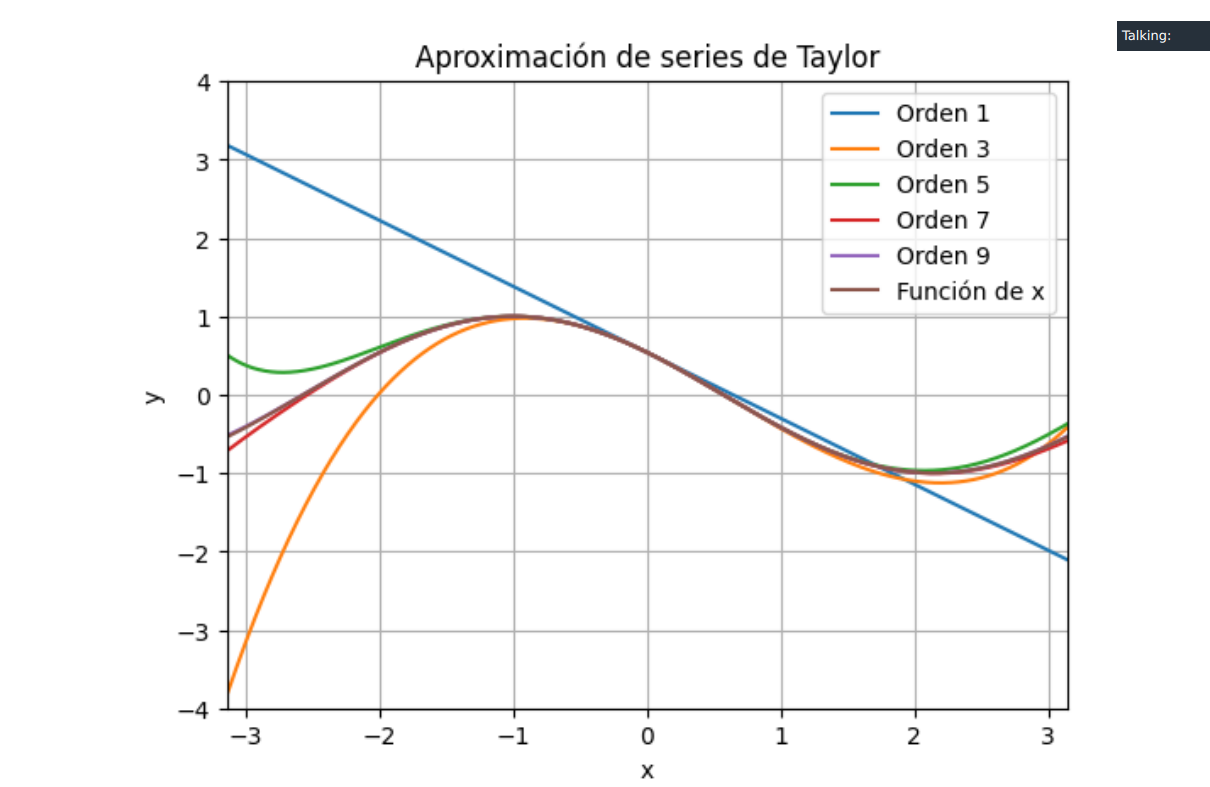

Obtenga la grafica anterior.